## Creating a Slideshow

Creating a slideshow is as easy as:

    ipython nbconvert your_slides.ipynb --to slides

If you want to immediately serve the slides to your web browser, just add `--post serve` at the command-line:

    ipython nbconvert your_slides.ipynb --to slides --post serve

In [1]:
# Some initial magic
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 6)
# from IPython.core.display import HTML
# HTML("<style>.container { width:100% !important; }</style>")

# Text Mining from the Command Line

John Laudun  
Department of English  
University of Louisiana at Lafayette  
johnlaudun@gmail.com  
http://johnlaudun.org/  
@johnlaudun  



## Agenda

1. Getting data/texts
2. Munging
3. Examining
4. Mining

## Getting Data

### `wget`

Sometimes CLI tools, like `wget`, are more powerful than GUI tools. The key difference is that GUI tools are easier to use at first, but repetitive tasks are difficult or expensive (in terms of time). CLI tools are a little more difficult at first, but once you have an established collection of them, they are not only easier to use but just plain easier. 

**`wget`** is one of those tools. E.g.:

    % wget -r -l 1 -w 2 --limit-rate=20k https://www.cs.cmu.edu/~spok/grimmtmp/

`wget` is a CLI program that retrieves web content. To my mind, since it can act like a targeted web crawler, it is the single greatest tool available to those looking to gather data/texts. 

Let's look at what it looks like:

    % wget -r -l 1 -w 2 --limit-rate=20k https://www.cs.cmu.edu/~spok/grimmtmp/
    
* `-r` (or `--recursive`) turns on recursive retrieving (up to 5 directories deep). 
* `-l 1` (or`--level=1`) keeps the depth to 1.
* `-w 2` gives the amount of time to wait between retrievals. (Two seconds lessens the server load.)
* `--limit-rate=20k` sets the retrieval rate to 20kB/s. (This is being polite in a shared connection setting.)

Our test case comes from Zach Isenhower: http://digital.library.okstate.edu/kappler/Vol2/Toc.htm. 

As it turns out, almost all the documents in which we are interested are housed in a single directory (below), which does not like being crawled. Running `wget` returns **ERROR 403: Forbidden**. In all likelihood, this is the result of the site's administrator configuring the website to make sure that directories cannot be browsed directly.

    !wget -r -l 1 -w 2 --limit-rate=20k http://digital.library.okstate.edu/kappler/Vol2/treaties/

We need, then, to be able to access the table of contents above, get all the links listed, and then download that list into a directory (folder in GUI terms) of our choosing.

## python

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

# To use this script, the user needs to provide the three values below: 
# myurl, myfilter, mydirectory
# Please make sure `mydirectory` is already created before running

myurl = "http://digital.library.okstate.edu/kappler/Vol2/Toc.htm"
myfilter = "http://digital.library.okstate.edu/kappler/Vol2/treaties/"
mydirectory = "/Users/jjl/Desktop/downloadedfiles/"

myconnection = urllib.request.urlopen(myurl)
myhtml = myconnection.read()
mysoup = BeautifulSoup(myhtml, "lxml")
mylinks = mysoup.find_all('a')

all_links = []
for tag in mylinks:
    link = tag.get('href',None)
    if link is not None:
        all_links.append(link)

myresults = [k for k in all_links if myfilter in k]

for result in myresults:
    remotefile = urllib.request.urlopen(result)
    localfile = open(mydirectory+result.replace(myfilter, ''),'wb')
    localfile.write(remotefile.read())
    localfile.close()
    remotefile.close()

To work with this script, all you need to do is provide three variables:

**myurl** is the page that lists the files

**myfilter** is the (remote) directory in which the files are stored

**mydirectory** is the (local) directory to which you wish to save the files. N.B.: You must create this directory ahead of time; and you must provide the absolute path from the root of your OS. The example path is from a Mac; Windows users will need something like `C:\Documents and Setting\username\path\to\folder`.

Now we have a directory (folder) sitting on our desktop and it has all the files we want:

![Screenshot of Full Directory](./Screenshot_directory.png)

## Munging

> **Data munging** or **data wrangling** is loosely the process of manually converting or mapping data from one "raw" form into another format that allows for more convenient consumption of the data with the help of semi-automated tools. This may include further munging, data visualization, data aggregation, training a statistical model, as well as many other potential uses. Data munging as a process typically follows a set of general steps which begin with extracting the data in a raw form from the data source, "munging" the raw data using algorithms (e.g. sorting) or parsing the data into predefined data structures, and finally depositing the resulting content into a data sink for storage and future use.

-- [Wikipedia](https://en.wikipedia.org/wiki/Data_wrangling)

In [ ]:
# Let's take a look at one of Zach's files:

!less apa0598.htm

No matter what Zach has in mind for this data, we can be pretty sure that it does not include a lot of angle brackets and funkiness like `div class="SANSLINE"`. (For the record, *funkiness* is a technical term in data munging. I'm serious. Go look it up.) Whatever Zach's next steps are, he is going to want to clean up the text. 

For this workshop, we are going to skip transforming this html into some kind of operable xml and focus on simply getting it into useful plain text. From there, Zach will be able to engage a number of automated processes which may be more, or less, interesting.

In [ ]:
from bs4 import BeautifulSoup

myfile = open('apa0598.htm', 'r')
myhtml = myfile.read()
mytext = BeautifulSoup(myhtml).text

print(mytext)

Now, we just need to clean up the entire folder!

Again, a bit of automation goes a long way...

In [4]:
import glob
from bs4 import BeautifulSoup

path = '/Users/jjl/Desktop/filesIN/'   
filesOUT = "/Users/jjl/Desktop/filesOUT/"
    
import glob
for path in glob.glob(*.htm):
    with open(path) as markup:
        soup = BeautifulSoup(markup.read())
    with open("strip_" + path, "w") as f: 
        f.write(soup.get_text().encode('utf-8'))
        
        with open(filename, 'r') as fhandle:
        text = BeautifulSoup(fhandle)


SyntaxError: invalid syntax (<ipython-input-4-6e10dde1bd22>, line 8)

## Text Mining with the NLTK

**Text mining** or **text analytics** (or those same phrases with *data* substituted for *text*) means a lot of things. It can mean simple textual statistics, building a concordance (or seeing key words in context), determining what words co-locate (collocate) with other words within a text or across texts, as well as what words co-occur with others across a number of texts (e.g., topic modeling).

That is, **text mining** is scalable both in terms of *scope*, focusing on small or large patterns, and in terms of *range*, focusing on a single text or dozens, hundreds, thousands of texts.

In our next series of explorations, we are going to use Python's NLTK module to work at the smaller end of the scope:

* create a corpus and view concordances, synonyms, collactions
* focus on only a single text to see what we can learn about it

### Corpus Views

A lot of our text mining can be done by treating all the texts as one large text file: collocations, concordances, and other textual features can all be explored within a global context. So, one of the common things that needs to get done is to create one text file with which to work.

The way to do this in Python is to read a folder full of texts into a single and then to join those list items into a single text. This seems weird, but this particular way of doing things actually uses less processing power and memory. The good news is that compiling documents into a single list is also the form in which Python's topic modeling module, `gensim`, expects them.

In [12]:
import glob

file_list = glob.glob('./texts' + '/*.txt')

mytexts = []
for filename in file_list:
    with open(filename, 'r') as f:
        mytexts.append(f.read().replace('\n', ' '))

alltexts = ''.join(mytexts)

With our text now *one big text file*, we can mumble the magic incantations which lets us play with our text within the NLTK:

(If you are ever curious, type `one big text file` into a search engine and saunter through the results.)

**N.B.**: If you ever get the response that you are missing something from NLTK, simply run `nltk.download()` and download what you need using the GUI.

In [ ]:
import nltk

tokens = nltk.word_tokenize(alltexts)
text = nltk.Text(tokens)

With that done, we can now begin to explore our corpus:

In [ ]:
myword = text.concordance("recommend")
print(myword)

In [ ]:
text.similar("recommend")

In [ ]:
text.common_contexts(["husband", "wife"])

In [ ]:
text.collocations()

In [13]:
text.collocations()

NameError: name 'text' is not defined

## A Brief Excursus on Control Logic

**Control logic** is what makes automation of processes possible. That is all. 

**Control logic** is entirely about you making the decisions and then writing those decisions down and then telling the script *Go do that while I grab a cup of coffee.*

**Control logic** is nothing to be scared of. 

    ... Nothing of which to be scared? 
    ... Nothing that should scare you? 
    ----------------------------------------------------------------
    LogicError                     Traceback (most recent call last)
    <English-input-13-4c23f72ea457> in <module>(prepositions)
    ----> syntax.prepositions()
    
If you can master prepositions, you can master **control logic**.

If you look through most of the scripting in this notebook, you will note that one kind of control logic dominates: the **for** loop. Its logic looks like this:

```
for thing in collection:
    do this
```

Implicit in this command is that the `for` loop is going to keep doing `this` until it runs out of `things`, at which point it stops. No more control logic is required of us as writers. In most cases, the collection is a folder (or directory) of texts.

Let's build a script that gets a list of word counts in a text, saves the counts to a CSV file. We will edit that CSV file to have a header in it, and then we will use the file to create a graph.

In [19]:
import glob

file_list = glob.glob('./texts/*.txt')
print(file_list)

['./texts/1811-Sense_and_Sensibility.txt', './texts/1813-Pride_and_Prejudice.txt', './texts/1814-Mansfield_Park.txt', './texts/1815-Emma.txt', './texts/1818-Northanger_Abbey.txt', './texts/1818-Persuasion.txt']


You are going to see **`glob`** a lot in these scripts. There are a number of ways to get files in Python. I tend to use `glob` because I tend to keep the files with which I am working in a single directory. 

Our first task is to feed `for` the `file_list`. 

Remember, our logic is `for` **`thing`** `in` **`collection`**. 

In this instance **`thing`** is the item with which we want to do something within the `for` loop, and we get to choose the name. (It could be `thing`, if you like, but remember that choosing meaningful names is part of writing good code.) In this next bit of code, you'll note that I've chosen the names `fpath` and `f` for the two iterators. I like those two names because they are very straightforward: the former is short for *filepath* which is what the `glob` module is in fact compiling into a list for me and `f` is shorthand for *file* which is what I want regex to work on. They are also traditional in Python coding. (Remember, I'm a folklorist.)

In [20]:
for fpath in glob.glob("../assets/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())

At this point, we haven't really told the `for` loop what to do with all this information. 

For now, to keep things simple, we are going to build a **dictionary**. 

In Python, a dictionary is simply a container for pairs of items, where one item is the key and the other the value. (When you look up a term in the dictionary, the term is the key that allows you to access the value you seek, the definition.) 

For this dictionary, we are going to use the filepath as the key and we are going to pair it with a pair of numbers. (The pair of numbers is in a particular data structure known as a tuple, but let's leave the larger discussion of data structures for another time.)

In [22]:
files = {}

for fpath in glob.glob("./texts/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())
    files[fpath] = [len(fixed_text.split()),len(set(fixed_text.split()))]

print(files)

{'./texts/1818-Northanger_Abbey.txt': [77687, 6101], './texts/1813-Pride_and_Prejudice.txt': [122159, 6378], './texts/1815-Emma.txt': [161096, 7278], './texts/1811-Sense_and_Sensibility.txt': [119941, 6401], './texts/1814-Mansfield_Park.txt': [160495, 7925], './texts/1818-Persuasion.txt': [83640, 5861]}


Having compiled our texts and data points into a dictionary, we are close to done. We could, if we wanted to, simply run this script and grab the data from our console, or we could save it to a file:

In [23]:
with open("textStats.csv", "w") as fileOut:
    for fname in files:
        print("{},{},{}".format(fname, files[fname][0], files[fname][1]), file=fileOut)

This time we have placed a `for` loop within a `with` statement. The `for` loop iterates over our dictionary, `files`, printing first the file name, which is the key, and then using the standard way of getting values out of a dictionary: dictionary[key]. Because our value is a list and we want one value then the other, and not both, we use a list index, 0 for the first value and 1 for the second value, to place them in the proper sequence as we build each line. 

With this final step, we have a CSV file that we can import into a spreadsheet application for further analysis and/or visualization. 

Here's the completed script, commented to make it easy to port elsewhere:

In [25]:
#! /usr/bin/env python

"""textstats.py: basic statistics for a collection of text files"""

import glob, re # import the two modules needed

files = {} # create an empty dictionary which we will populate with the for loop

# this for loop navigates to a directory, opens each file, normalizes the text
# and then counts words, saving the counts to a list 
for fpath in glob.glob("./texts/*.txt"):
    with open(fpath) as f:
         fixed_text = re.sub("[^a-zA-Z']", " " , f.read().lower())
    files[fpath] = [len(fixed_text.split()),len(set(fixed_text.split()))]

# save the results to a file
with open("textStats.csv", "w") as fileOut:
    for fname in files:
        print("{},{},{}".format(fname, files[fname][0], files[fname][1]), file=fileOut)

## Let's Graph That

In [30]:
import pandas as pd

df = pd.read_csv("textStats.csv", ",")
print(df)

                    Text   Count  Lexicon
0       Northanger_Abbey   77687     6101
1    Pride_and_Prejudice  122159     6378
2                   Emma  161096     7278
3  Sense_and_Sensibility  119941     6401
4         Mansfield_Park  160495     7925
5             Persuasion   83640     5861


It's a very tidy setup with very little work on our part. One line of code. Sorting by the longest text is just as easy:

In [36]:
by_longest = df.sort_values(by="Count", axis=0, ascending=False) 
print(by_longest)

                    Text   Count  Lexicon
2                   Emma  161096     7278
4         Mansfield_Park  160495     7925
1    Pride_and_Prejudice  122159     6378
3  Sense_and_Sensibility  119941     6401
5             Persuasion   83640     5861
0       Northanger_Abbey   77687     6101


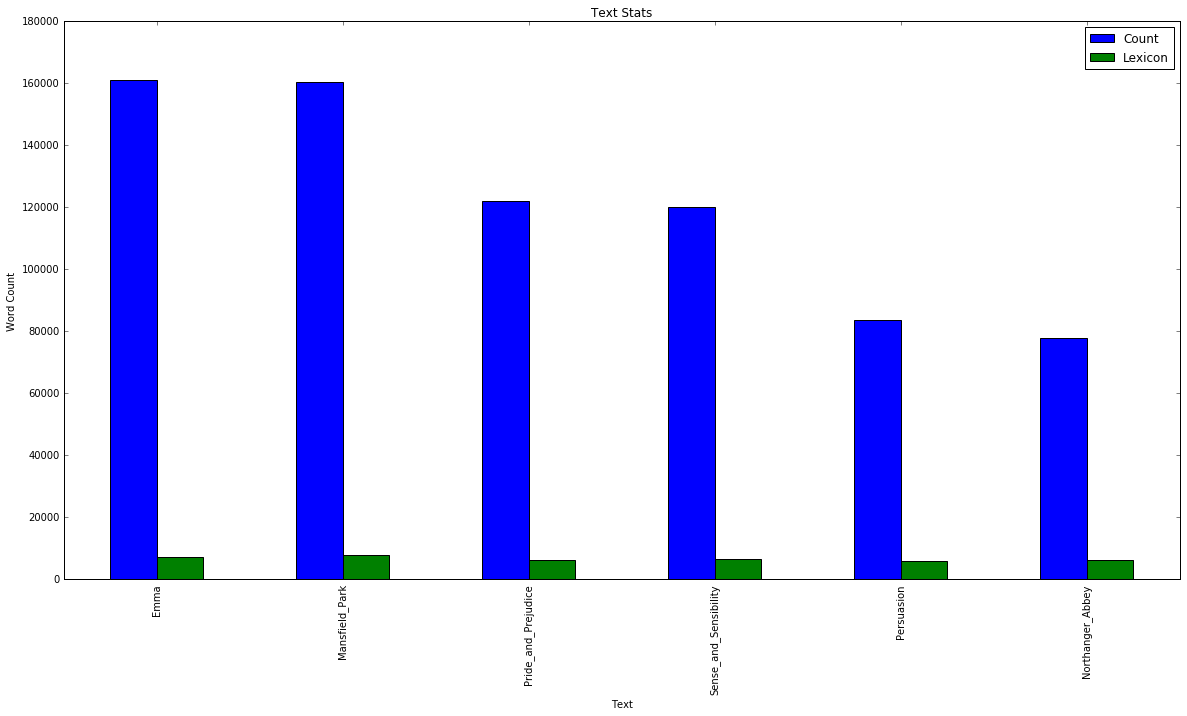

In [39]:
import matplotlib as mpl

ax = by_longest[['Count','Lexicon']].plot(kind='bar', 
                                           title ="Text Stats",
                                           figsize=(20,10),
                                           legend=True)
ax.set_xlabel("Text")
ax.set_ylabel("Word Count")
ax.set_xticklabels(list(by_longest['Text'])) 
mpl.pyplot.show()

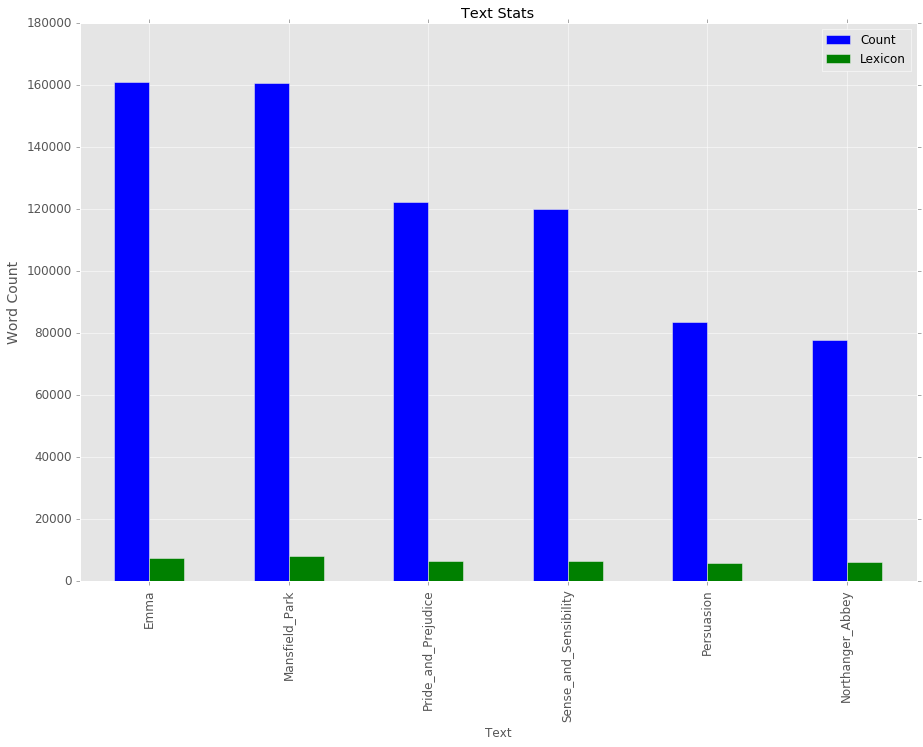

In [41]:
#! /usr/bin/env python

"""pytaChart.py: a bar chart from a dataframe of text statistics"""

import pandas as pd, matplotlib as mpl

# Import data from file into dataframe
df = pd.read_csv("textStats.csv", ",")

# Sort by the longest text
by_longest = df.sort_values(by="Count", axis=0, ascending=False) 

# Draw the graph (note use of ggplot)
mpl.style.use('ggplot')
ax = by_longest[['Count','Lexicon']].plot(kind='bar', 
                                           title ="Text Stats",
                                           figsize=(15,10),
                                           legend=True,
                                           fontsize=12)
ax.set_xlabel("Text",fontsize=12)
ax.set_ylabel("Word Count",fontsize=14)
ax.set_xticklabels(list(by_longest['Text'])) 
mpl.pyplot.show()

### Single Text Views

We can also work with single texts to understand them in new ways. Here we will work with a short story, "The Most Dangerous Game," published in time for it to be both in the public domain and yet remain a part of our collective literary/semiotic tradition.

In [ ]:
# First, let's load the text file:
mdg = open("./mdg.txt").read()

In [ ]:
# Next, let's find out how long it is:
len(mdg)

In [ ]:
# 44078 what? Characters. We prefer words:

mdgtokens = nltk.word_tokenize(mdg)
len(mdgtokens)

In [ ]:
# 9717 words AND punctuation marks. 

import re

mdg_words = re.sub("[^a-zA-Z'-]"," ", open("./mdg.txt").read())
print(mdg_words)

In [ ]:
len(mdg_words)

In [ ]:
mdg_word_list = mdg_words.split()
print(mdg_word_list)

In [ ]:
len(mdg_word_list)

In [ ]:
sorted(mdg_word_list)

In [ ]:
sorted(set(mdg_word_list))

In [ ]:
len(sorted(set(mdg_word_list)))

In [ ]:
import re

mdg2 = open("./mdg.txt").read()
mdg2_words = re.sub("[^a-zA-Z'-]"," ", open("./mdg.txt").read().lower())
mdg2_word_list = mdg2_words.split()
len(sorted(set(mdg2_word_list)))

In [ ]:
# Lexical Diversity of MDG:
len(mdg2_word_list) / len(set(mdg2_word_list))

We can also use the NLTK to explore a single text.

In [7]:
import nltk, re

mdg_raw = open("./mdg.txt").read()
mdg_words = re.sub("[^a-zA-Z'-]"," ", mdg_raw)
mdg_case = mdg_words.lower()

# print(mdg_case)

In [8]:
mdg_tokens = nltk.word_tokenize(mdg_case)
mdg_text = nltk.Text(mdg_tokens)

In [4]:
len(mdg_tokens)

8109

In [9]:
len(mdg_tokens) / len(set(mdg_tokens))

4.203732503888025

On average, a word occurs four times in "The Most Dangerous Game."

Out of curiosity, how many words occur four times?

In [9]:
wordfrequency = nltk.FreqDist(mdg_tokens)
four_times = [word for word in wordfrequency.keys() if wordfrequency[word] == 4]
print(four_times)

['branches', 'evil', 'flight', 'evening', 'steps', 'read', 'may', 'struck', 'shook', 'faint', 'kind', 'dangerous', 'pointing', 'shore', 'head', 'voice', 'mean', 'let', 'sailors', 'huge', 'seemed', 'bush', 'fall', 'buffalo', 'tried', 'real', 'tigers', 'hunted', 'turned', 'leaped', 'asked', 'glass', 'going', 'mind', 'jaguar', 'cape', 'near', 'want', 'danger', 'still', 'perhaps', 'cut', 'lips', 'answer', 'raised', 'chateau', 'death', 'climbed', 'sometimes', 'opened', 'long', 're', 'old', 'nothing', 'shoulders', 'bottle', 'idea', 'left', 'water', 'direction', 'small', 'lost', 'young', 'suppose', 'hundred', 'day', 'strength', 'mine']


In [11]:
mdg_text.count("dangerous")

4

In [5]:
mdg_text.concordance("dangerous")

Displaying 4 of 4 matches:
 that the cape buffalo is the most dangerous of all big game for a moment the g
r the cape buffalo is not the most dangerous big game he sipped his wine here i
 in the same slow tone i hunt more dangerous game rainsford expressed his surpr
reason after a fashion so they are dangerous but where do you get them the gene


Where does "dangerous" occur within the larger text?

In [21]:
mdg_text.dispersion_plot(["dangerous", "danger", "game", "fear"])

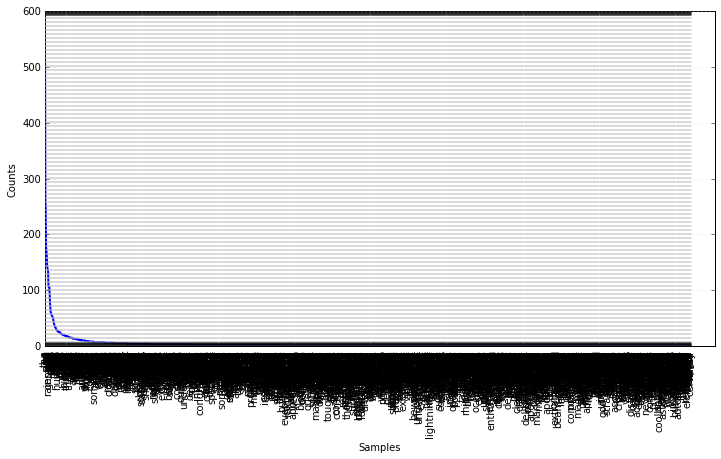

In [22]:
wordfrequency.plot()

In [10]:
freq_dic = {}
for word in mdg_tokens:
#        word = punctuation.sub("", word)
        try:
            freq_dic[word] += 1
        except: 
            freq_dic[word] = 1
word_list = [(val, key) for key, val in freq_dic.items()]

# print(sorted(word_list, reverse=True))

In [11]:
# More useful to save this to a file:

import csv

with open('output.csv', 'w') as f:
        wtr = csv.writer(f)
        wtr.writerows(sorted(word_list, reverse=True))
        f.close()

## Text Mining from Space

All text mining is simply an attempt to find numerical representations of texts that are meaningful/useful to the analyst. Nothing more. If there is magic in it, then it is in the **speed** and with which it can be done and the **scale** on which it can be come. 

There are a lot of possibilities, but the most popular one at present is known as **topic modeling**. The mechanics of topic modeling are so instrumental in the present moment that one form of it, **LSA** (Latent Semantic Analysis) is built right into Mac OS X.

That noted the topic modeling that most humanists are doing is with Mallet, which uses a significant statistical tweak: **LDA** (Latent Dirichlet Allocation). 

No matter what form of topic modeling is in play, the process groups words by how often they occur with other words within a text, and, then, sorts the documents involved by these word groups. (The word groupings are called topics.)

**Nota bene**: Topic models, like other statistical approaches to texts, do not pay any attention to syntax: texts are reduced to "bags of words": it is not unknown to re-create texts as `bow`s from word frequency distributions. (Topic models don't care.)

*TL;DR: (1) The math works. (2) Cognitive studies suggest it captures some essential elements of how we think about texts. (3) Make sure you choose the math that is right for your work.*

## Topic Modeling

## Resources

PÃ©rez, Fernando and Brian E. Granger. 2007. IPython: A System for Interactive Scientific Computing. _Computing in Science and Engineering_ 9(3): 21-29. doi:10.1109/MCSE.2007.53. URL: http://ipython.org